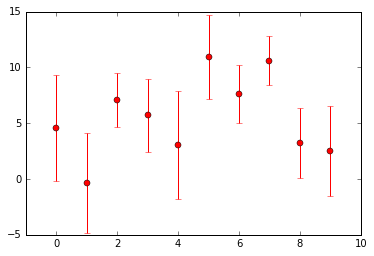

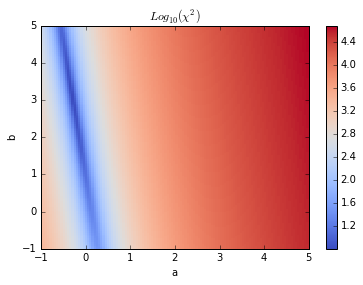

14 82 28
218408
6.47479317373
Results for a,b,c =  -0.305785123967 3.06611570248 1.0826446281
184 8.18318318318
342 14.3513513514
534 21.8468468468


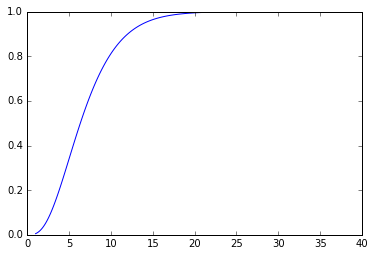

[184 342 534]
[  8.18318318  14.35135135  21.84684685]


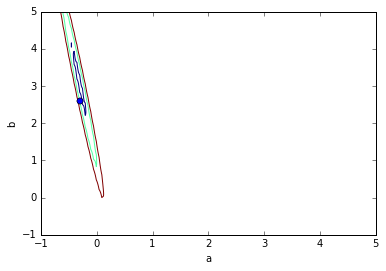

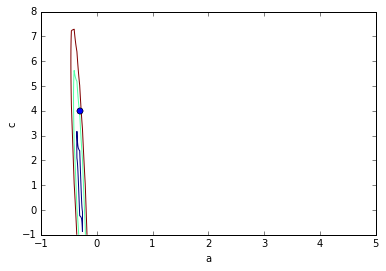

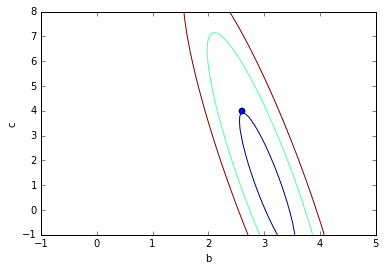

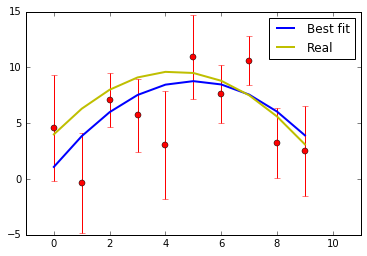

In [3]:
##Part to constrain different kind of surveys using Fisher Matrix
###We start with the initial example using y=ax**2 + bx + c

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt

x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

plt.errorbar(x,y,err, fmt='o', color='r')
plt.xlim(-1, 10)
plt.show()

nbb=122

tab_chi2 = np.zeros( (nbb, nbb, nbb) )

tab_a = np.linspace(-1, 5, nbb)
tab_b = np.linspace(-1, 5, nbb)
tab_c = np.linspace(-1, 8, nbb)

for i in range(0,nbb):
    for j in range(0,nbb):
        for k in range(0,nbb):
            
            tab_chi2[i,j,k] = np.sum( np.power(tab_a[i]*np.power(x,2) + tab_b[j]*x + tab_c[k] - y,2)/np.power(err,2) )

     
    
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)
    
plt.pcolormesh(tab_a, tab_b, np.transpose(np.log10(tab_chi2[:,:,t_min[2]]) ), cmap='coolwarm')
plt.xlabel('a')
plt.ylabel('b')
plt.title('$Log_{10}(\chi^2)$')
plt.colorbar()
plt.show()



print (t_min[0], t_min[1], t_min[2])
print (np.argmin(tab_chi2))
print (tab_chi2[t_min])

print ('Results for a,b,c = ',tab_a[t_min[0]], tab_b[t_min[1]], tab_c[t_min[2]])

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = len(x)-3
nbs = 1000
tab_val = np.linspace(1,40, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print (index_sig[i], tab_val[index_sig[i]])

plt.plot(tab_val, tab_gi)
plt.show()

print (index_sig)

levels = tab_val[index_sig]
print (levels)

#real values
a=-0.3
b=2.6
c=4

tab_name=['$1 \sigma$', '$2 \sigma$', '$3 \sigma$' ]

#for i in range(3): tab_name.append('$'+str(i)+'\sigma$')

#fig, ax=plt.subplots(1,3, figsize = (18,6))
cset = plt.contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
plt.plot( [a,a], [b,b], 'o')
plt.xlabel('a')
plt.ylabel('b')
plt.show()
plt.contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
plt.plot( [a,a], [c,c], 'o')
plt.xlabel('a')
plt.ylabel('c')
plt.show()

plt.contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
#plt.clabel(cset,inline='true', fmt=tab_name[i], fontsize=10)
plt.plot( [b,b], [c,c], 'o')
plt.xlabel('b')
plt.ylabel('c')
plt.show()


best_model = tab_a[t_min[0]]*np.power(x,2) + tab_b[t_min[1]]*x + tab_c[t_min[2]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()





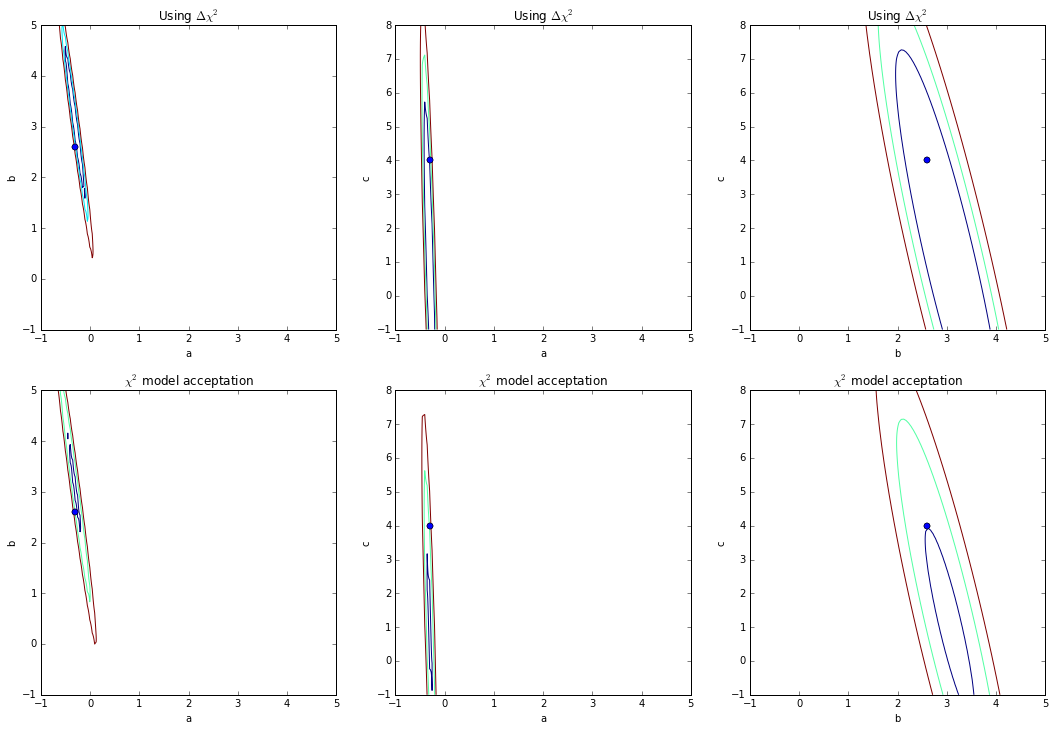

In [5]:
###Part to see the difference between the p-value contours and the Delta-chi^2 table assuming best-fit model as the 
#real one
#####PART with the Delta_Chi^2 computed (So not the )

tab_delta_chi2 = tab_chi2 - tab_chi2.min()

cut68 = 3.50
cut90 = 6.25
cut99 = 11.30

lev_dc = np.array([cut68, cut90, cut99])


fig, ax = plt.subplots(2,3, figsize=(18,12))

ax[0,0].contour(tab_a, tab_b, np.transpose(tab_delta_chi2[:,:, t_min[2]]), lev_dc)
ax[0,0].plot( [a,a], [b,b], 'o')
ax[1,0].contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
ax[1,0].plot( [a,a], [b,b], 'o')
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('Using $\Delta\chi^2$')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('$\chi^2$ model acceptation')
#plt.show()
ax[0,1].contour(tab_a, tab_c, np.transpose(tab_delta_chi2[:,t_min[1] ,:]), levels)
ax[0,1].plot( [a,a], [c,c], 'o')
ax[1,1].contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
ax[1,1].plot( [a,a], [c,c], 'o')
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('Using $\Delta\chi^2$')
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('$\chi^2$ model acceptation')

ax[0,2].contour(tab_b, tab_c, np.transpose(tab_delta_chi2[t_min[0] ,:,: ]), levels)
ax[0,2].plot( [b,b], [c,c], 'o')
ax[1,2].contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
ax[1,2].plot( [b,b], [c,c], 'o')
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('Using $\Delta\chi^2$')
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('$\chi^2$ model acceptation')
plt.show()

(14, 82, 28)
1.0826446281


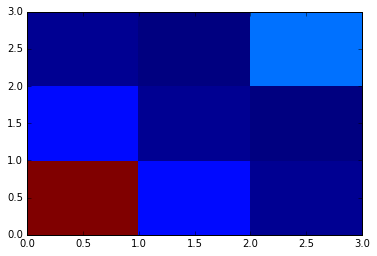

[[  6.49676885e-03  -4.51431706e-02   5.36552002e-05]
 [ -4.51431706e-02   3.29916304e-01  -5.85618028e-04]
 [  5.36552002e-05  -5.85618028e-04   1.34494674e-03]]
[[ 3132.75047109   428.77066241    61.71803948]
 [  428.77066241    61.71803948     9.76798593]
 [   61.71803948     9.76798593   745.3148762 ]]


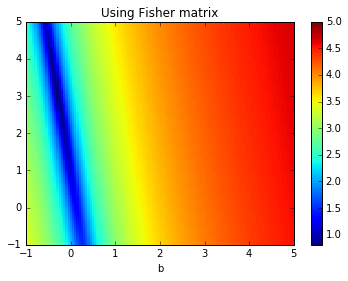

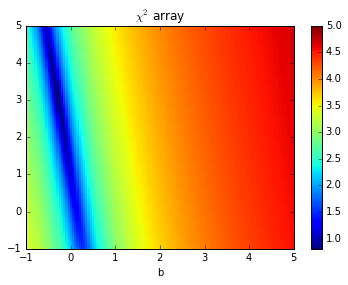

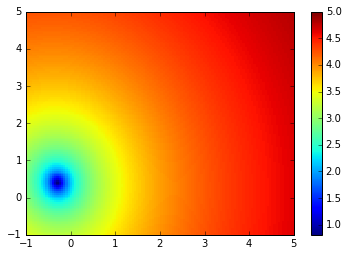

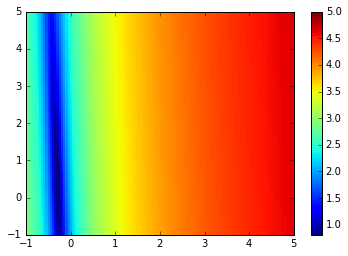

[[ 3132.75047109   428.77066241    61.71803948]
 [  428.77066241    61.71803948     9.76798593]
 [   61.71803948     9.76798593   745.3148762 ]]


In [8]:
###Part to do it with the fisher matrix

matrix_2nd_der = np.zeros( (3,3) )   ###because 3 parameters

delta_a = tab_a[1] - tab_a[0]
delta_b = tab_b[1] - tab_b[0]
delta_c = tab_c[1] - tab_c[0]

delta_i = np.array([delta_a, delta_b, delta_c])

##Diagonal terms

matrix_2nd_der[0,0] = (tab_chi2[t_min[0]+2, t_min[1], t_min[2]] - 
                       2*tab_chi2[t_min[0], t_min[1], t_min[2]] + 
                       tab_chi2[t_min[0]-2, t_min[1], t_min[2]])/(4*delta_a**2)
matrix_2nd_der[1,1] = (tab_chi2[t_min[0], t_min[1]+2, t_min[2]] - 
                       2*tab_chi2[t_min[0], t_min[1], t_min[2]] + 
                       tab_chi2[t_min[0], t_min[1]-2, t_min[2]])/(4*delta_b**2)
matrix_2nd_der[2,2] = (tab_chi2[t_min[0]+2, t_min[1], t_min[2]+2] 
                       - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] 
                       + tab_chi2[t_min[0], t_min[1], t_min[2]-2])/(4*delta_c**2)


##Off-diagonal terms (3 independants components 12=21 13=31 23=32, in index : 01=10 02=20 12=21)

matrix_2nd_der[0,1]= (tab_chi2[t_min[0]+1, t_min[1]+1, t_min[2]] - 
                      tab_chi2[t_min[0]-1, t_min[1]+1, t_min[2]] - 
                      tab_chi2[t_min[0]+1, t_min[1]-1, t_min[2]] + 
                      tab_chi2[t_min[0]-1, t_min[1]-1, t_min[2]]  )/(4.*delta_a*delta_b)
matrix_2nd_der[1,0] = matrix_2nd_der[0,1]

matrix_2nd_der[0,2]= (tab_chi2[t_min[0]+1, t_min[1], t_min[2]+1] - 
                      tab_chi2[t_min[0]-1, t_min[1], t_min[2]+1] - 
                      tab_chi2[t_min[0]+1, t_min[1], t_min[2]-1] + 
                      tab_chi2[t_min[0]-1, t_min[1], t_min[2]-1]  )/(4.*delta_a*delta_c)
matrix_2nd_der[2,0] = matrix_2nd_der[0,2]

matrix_2nd_der[1,2]= (tab_chi2[t_min[0], t_min[1]+1, t_min[2]+1] - 
                      tab_chi2[t_min[0], t_min[1]-1, t_min[2]+1] - 
                      tab_chi2[t_min[0], t_min[1]+1, t_min[2]-1] + 
                      tab_chi2[t_min[0], t_min[1]-1, t_min[2]-1]  )/(4.*delta_a*delta_c)
matrix_2nd_der[2,1] = matrix_2nd_der[1,2]

print (t_min)
print (tab_c[t_min[2]])

plt.pcolormesh(matrix_2nd_der)
plt.show()

##Inverse Matrix
print (np.matrix(matrix_2nd_der).I)

tab_approx_delta_chi2 = np.zeros( (nbb, nbb, nbb) )

matrix_invert =  np.matrix(matrix_2nd_der).I

print  (np.transpose(matrix_2nd_der))

for i in range(nbb):
    for j in range(nbb):
        for k in range(nbb):
            vec_delta=np.array([ tab_a[i]-tab_a[t_min[0]] , tab_b[j]-tab_b[t_min[1]], tab_c[k]-tab_c[t_min[2]] ])
            tab_approx_delta_chi2[i,j,k] = np.dot( vec_delta, np.dot( np.transpose(matrix_2nd_der) , 
                                                                     vec_delta.reshape(3,1) ) )
            
            
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:,:, t_min[2] ])+
                                      tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
plt.xlabel('a')
plt.xlabel('b')
plt.title('Using Fisher matrix')
plt.colorbar()
plt.show()
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:,:, t_min[2] ])), vmax=5  )
plt.colorbar()
plt.xlabel('a')
plt.xlabel('b')
plt.title('$\chi^2$ array')
plt.show()

plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:, t_min[1], : ])+tab_chi2.min()) ,
               vmax=5 ) ###chi2_min in order to compare with tab_chi2 
plt.colorbar()
plt.show()
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:, t_min[1], : ])), vmax=5  )
plt.colorbar()
plt.show()



print (matrix_2nd_der)


(14, 82, 28)
1.0826446281


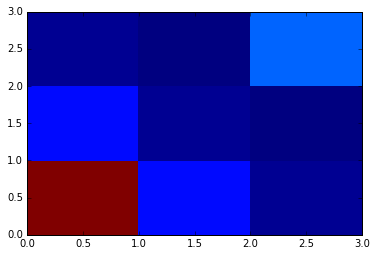

[[  6.49688635e-03  -4.51444531e-02   5.66004490e-05]
 [ -4.51444531e-02   3.29930301e-01  -6.17763855e-04]
 [  5.66004490e-05  -6.17763855e-04   1.41877375e-03]]


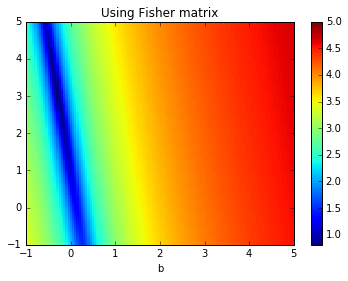

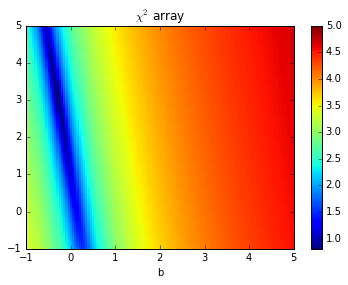

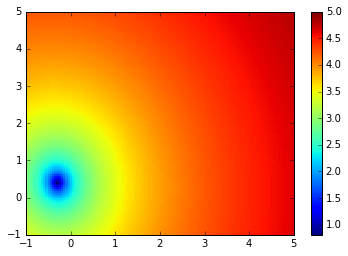

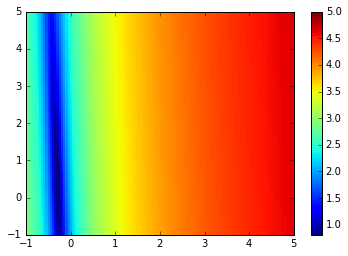

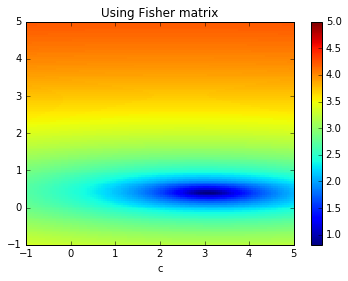

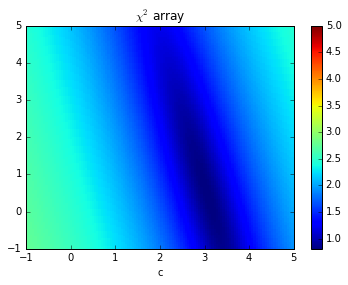

In [10]:
###Part to do it with the fisher matrix

matrix_2nd_der = np.zeros( (3,3) )   ###because 3 parameters


factor = 5
delta_a = (tab_a[1] - tab_a[0])*factor
delta_b = (tab_b[1] - tab_b[0])*factor
delta_c = (tab_c[1] - tab_c[0])*factor

delta_i = np.array([delta_a, delta_b, delta_c])

##Diagonal terms

matrix_2nd_der[0,0] = (tab_chi2[t_min[0]+2*factor, t_min[1], t_min[2]] - 
                       2*tab_chi2[t_min[0], t_min[1], t_min[2]] + 
                       tab_chi2[t_min[0]-2*factor, t_min[1], t_min[2]])/(4*delta_a**2)
matrix_2nd_der[1,1] = (tab_chi2[t_min[0], t_min[1]+2*factor, t_min[2]] - 
                       2*tab_chi2[t_min[0], t_min[1], t_min[2]] + 
                       tab_chi2[t_min[0], t_min[1]-2*factor, t_min[2]])/(4*delta_b**2)
matrix_2nd_der[2,2] = (tab_chi2[t_min[0]+2*factor, t_min[1], t_min[2]+2] - 
                       2*tab_chi2[t_min[0], t_min[1], t_min[2]] + 
                       tab_chi2[t_min[0], t_min[1], t_min[2]-2*factor])/(4*delta_c**2)


##Off-diagonal terms (3 independants components 12=21 13=31 23=32, in index : 01=10 02=20 12=21)

matrix_2nd_der[0,1]= (tab_chi2[t_min[0]+1*factor, t_min[1]+1*factor, t_min[2]] - 
                      tab_chi2[t_min[0]-1*factor, t_min[1]+1*factor, t_min[2]] -
                      tab_chi2[t_min[0]+1*factor, t_min[1]-1*factor, t_min[2]] + 
                      tab_chi2[t_min[0]-1*factor, t_min[1]-1*factor, t_min[2]]  )/(4.*delta_a*delta_b)
matrix_2nd_der[1,0] = matrix_2nd_der[0,1]

matrix_2nd_der[0,2]= (tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]+1*factor] - 
                      tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]+1*factor] - 
                      tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]-1*factor] + 
                      tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]-1*factor]  )/(4.*delta_a*delta_c)
matrix_2nd_der[2,0] = matrix_2nd_der[0,2]

matrix_2nd_der[1,2]= (tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]+1*factor] - 
                      tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]+1*factor] - 
                      tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]-1*factor] + 
                      tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]-1*factor]  )/(4.*delta_b*delta_c)
matrix_2nd_der[2,1] = matrix_2nd_der[1,2]

print (t_min)
print (tab_c[t_min[2]])

plt.pcolormesh(matrix_2nd_der)
plt.show()

##Inverse Matrix
print (np.matrix(matrix_2nd_der).I)

tab_approx_delta_chi2 = np.zeros( (nbb, nbb, nbb) )

matrix_invert =  np.matrix(matrix_2nd_der).I

for i in range(nbb):
    for j in range(nbb):
        for k in range(nbb):
            vec_delta=np.array([ tab_a[i]-tab_a[t_min[0]] , tab_b[j]-tab_b[t_min[1]], tab_c[k]-tab_c[t_min[2]] ])
            tab_approx_delta_chi2[i,j,k] = np.dot( vec_delta, np.dot( matrix_2nd_der , vec_delta.reshape(3,1) ) )
            
###chi2_min in order to compare with tab_chi2 
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:,:, t_min[2] ])+tab_chi2.min()) ,
               vmax=5 )
plt.xlabel('a')
plt.ylabel('b')
plt.title('Using Fisher matrix')
plt.colorbar()
plt.show()
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:,:, t_min[2] ])), vmax=5  )
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b')
plt.title('$\chi^2$ array')
plt.show()

###chi2_min in order to compare with tab_chi2 
plt.pcolormesh(tab_a, tab_c, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:, t_min[1], : ])+tab_chi2.min()) ,
               vmax=5 ) 
plt.xlabel('a')
plt.ylabel('c')
plt.colorbar()
plt.show()
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:, t_min[1], : ])), vmax=5  )
plt.colorbar()
plt.show()

###chi2_min in order to compare with tab_chi2 
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[ t_min[0],:,: ])+tab_chi2.min()) ,
               vmax=5 )
plt.xlabel('b')
plt.xlabel('c')
plt.title('Using Fisher matrix')
plt.colorbar()
plt.show()
plt.pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[ t_min[0], :, : ])), vmax=5  )
plt.colorbar()
plt.xlabel('b')
plt.xlabel('c')
plt.title('$\chi^2$ array')
plt.show()



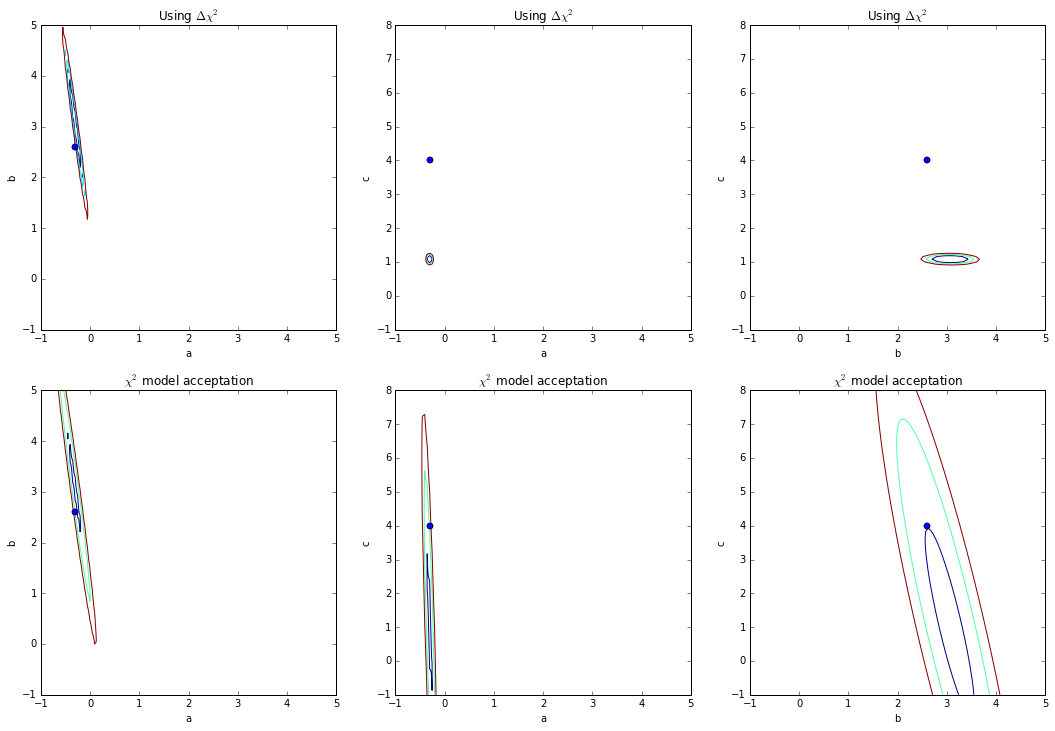

In [11]:
####Do the contours using the Fisher matrix using delta_chi2 table
####That's the same we did with the delta_chi2 array

fig, ax = plt.subplots(2,3, figsize=(18,12))

ax[0,0].contour(tab_a, tab_b, np.transpose(tab_approx_delta_chi2[:,:, t_min[2]]), lev_dc)
ax[0,0].plot( [a,a], [b,b], 'o')
ax[1,0].contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
ax[1,0].plot( [a,a], [b,b], 'o')
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('Using $\Delta\chi^2$')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('$\chi^2$ model acceptation')

ax[0,1].contour(tab_a, tab_c, np.transpose(tab_approx_delta_chi2[:,t_min[1] ,:]), levels)
ax[0,1].plot( [a,a], [c,c], 'o')
ax[1,1].contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
ax[1,1].plot( [a,a], [c,c], 'o')
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('Using $\Delta\chi^2$')
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('$\chi^2$ model acceptation')

ax[0,2].contour(tab_b, tab_c, np.transpose(tab_approx_delta_chi2[t_min[0] ,:,: ]), levels)
ax[0,2].plot( [b,b], [c,c], 'o')
ax[1,2].contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
ax[1,2].plot( [b,b], [c,c], 'o')
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('Using $\Delta\chi^2$')
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('$\chi^2$ model acceptation')


plt.show()